In [1]:
import numpy as np
from engine import Image, colors
from noises import *
from utilities import *
from matplotlib import pyplot as plt
import matplotlib
RESOLUTION = 500

/home/ventus/Desktop/AI4Games-project/engine.py:22: UserWarning: Trying to register the cmap 'peaks' which already exists.
  register_cmap(name=name, cmap=cmap)


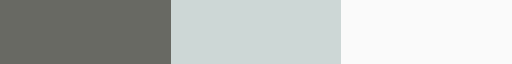

In [8]:
colors(
    name="peaks",
    colors=["#686963", "#CDD7D6", "#FAFAFA"]
)

In [7]:
continent = norm(simplex(resolution=RESOLUTION, octaves=10, persistence=10.0, lacunarity=-0.03, seed=500))

def cut(matrix, threshold = 0):
	matrix[matrix <= threshold] = 0
	return matrix

def land_mass_distribution(points=2, radius=1, seed=1234):
	return (-worley(resolution=RESOLUTION, points=points, n=1, seed=seed) + 1) ** radius

def land_mass_shape(lacunarity = 0.0, seed = (0, 1000)):
	return simplex(resolution=RESOLUTION, octaves=4, persistence=2,
	lacunarity=lacunarity + 0.2, seed=seed)

def land_mass(clusters = 1, seed=123):
	alpha = 1.5
	if clusters == 1:
		clusters = continent
	else:
		clusters = land_mass_distribution(points=clusters, radius=3+clusters/10, seed=seed)
	return land_mass_shape(lacunarity=0, seed=seed) + alpha * clusters

def border_layer(temperature=20, cutoff=0):
	return cut(-heat(RESOLUTION, temperature, 250, 250), cutoff)

def archipelago(clusters = 1, beaches = 0.6, border = True, land = 0.3, seed = 1000):
	terrain = land_mass(clusters=clusters, seed=seed)-1
	if border:
		terrain -= border_layer(20)
		beaches -= 0.1

	terrain += land
	return norm(np.sign(terrain) * np.abs(terrain)**beaches)

def moisture(lacunarity = 0.0, seed = 1000):
	return simplex(resolution=RESOLUTION, octaves=4, persistence=2,
	lacunarity=lacunarity + 0.2, seed=seed)

def islands(clusters = 1, beaches = 0.6, border = True, land = 0.3, mountains = 0.5, seed = 1000):
	lc = Colormap('islands')
	mc = Colormap('forests')
	pc = Colormap('peaks')
	
	res = np.zeros(shape=(RESOLUTION, RESOLUTION, 4))
	mstr = norm(moisture(seed=10000 * np.sin(seed)))
	arch = archipelago(
		clusters=clusters,
		beaches=beaches,
		land=land,
		seed=seed,
		border=border)

	# huge bottleneck :(
	for x, y in cells(arch):
		tile = arch[x, y]
		mountain_threshold  = 1 - 0.4*mountains
		if tile > mountain_threshold:
			res[x, y] = pc((tile - mountain_threshold) / (1 - mountain_threshold))
		elif tile > 0.6:
			res[x][y] = compose(lc(arch[x, y]), mc(mstr[x, y]), ratio=0.2)
		else:
			res[x][y] = lc(arch[x][y])
	return res

Image(islands, clusters=(1,100), beaches=(0.4, 0.8,0.01), land = 0.0, mountains = (0.0, 1.0), seed=(0, 5000), border=True)

interactive(children=(IntSlider(value=50, description='clusters', min=1), FloatSlider(value=0.6000000000000001…